In [7]:
import torch, os, json, random
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [8]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [9]:
def load_graphs_and_data_info(scene_graph_path, data_info_path):
    scene_graphs = torch.load(scene_graph_path)
    data_info = json.load(open(data_info_path))
    print('The number of graphs is: ' + str(len(scene_graphs)))
    return scene_graphs, data_info

In [10]:
def draw_graph(scene_graphs, data_info, query):
    ind_to_classes = data_info['ind_to_classes']
    ind_to_predicates = data_info['ind_to_predicates']
    ind_to_files = data_info['idx_to_files']
    keys = list(scene_graphs.keys())
    if not len(keys) > 0:
        raise RuntimeError('The number of graphs is 0')
    if not len(keys) == len(ind_to_files): 
        raise RuntimeError('Something Wrong, the number of graphs is not equal with the data_info')
    image_folder = os.path.dirname(ind_to_files[0])
    if isinstance(query, str):
        graph = scene_graphs[query]
        image_path = os.path.join(image_folder, query + '.jpg')
    elif isinstance(query, int):
        query = max(0, query)
        query = min(len(keys) - 1, query)
        graph = scene_graphs[keys[query]]
        image_path = ind_to_files[query]
    else:
        raise RuntimeError('The type of query should be str (name of the image) or int (index in the *.pkl file)')
    boxes = graph['box'].tolist()
    box_labels = graph['box_labels'].tolist()
    rel_labels = graph['rel_labels'].tolist()
    rel_pairs = graph['rel_pairs'].tolist()
    rel_print_labels = []
    for i in range(len(rel_pairs)):
        label = str(rel_pairs[i][0]) + '_' + ind_to_classes[box_labels[rel_pairs[i][0]]] + ' => ' + ind_to_predicates[rel_labels[i]] + ' => ' + str(rel_pairs[i][1]) + '_' + ind_to_classes[box_labels[rel_pairs[i][1]]]
        rel_print_labels.append(label)
    box_print_labels = []
    for box_label in box_labels:
        box_print_labels.append(ind_to_classes[box_label])
    draw_image(image_path, boxes, box_print_labels, rel_print_labels)

In [11]:
scene_graph_path = '/home/lzj/code/sgg/outputs/filted_scene_graphs.pkl'
data_info_path = '/home/lzj/code/sgg/outputs/data_info.json'
scene_graphs, data_info = load_graphs_and_data_info(scene_graph_path, data_info_path)

The number of graphs is: 26446


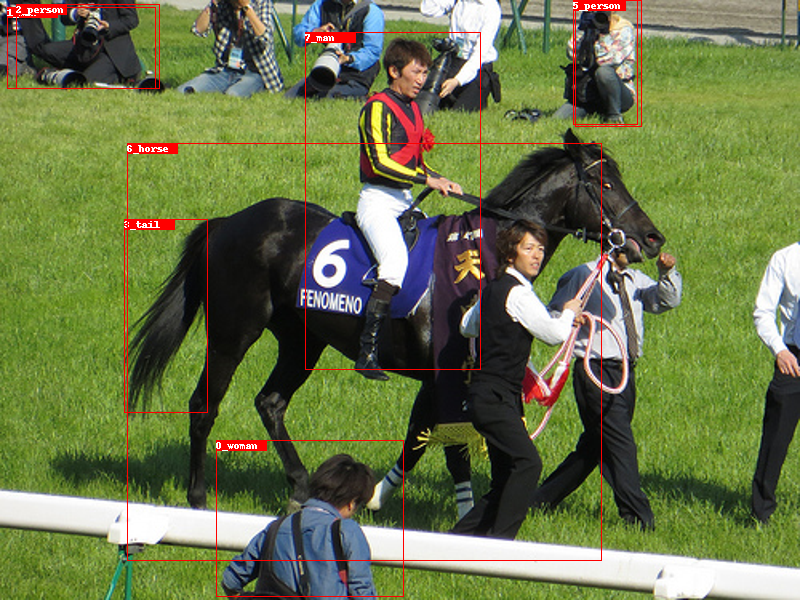

**************************************************
box_labels 0: woman
box_labels 1: man
box_labels 2: person
box_labels 3: tail
box_labels 4: woman
box_labels 5: person
box_labels 6: horse
box_labels 7: man
**************************************************
rel_labels 0: 7_man => riding => 6_horse
rel_labels 1: 5_person => watching => 7_man
rel_labels 2: 4_woman => watching => 7_man
rel_labels 3: 6_horse => has => 3_tail
rel_labels 4: 2_person => watching => 7_man
rel_labels 5: 1_man => watching => 7_man
rel_labels 6: 4_woman => watching => 0_woman
rel_labels 7: 5_person => watching => 0_woman


In [21]:
query = '2315497' # str (name of the image withour suffix) or int (index of the image)
draw_graph(scene_graphs, data_info, query)

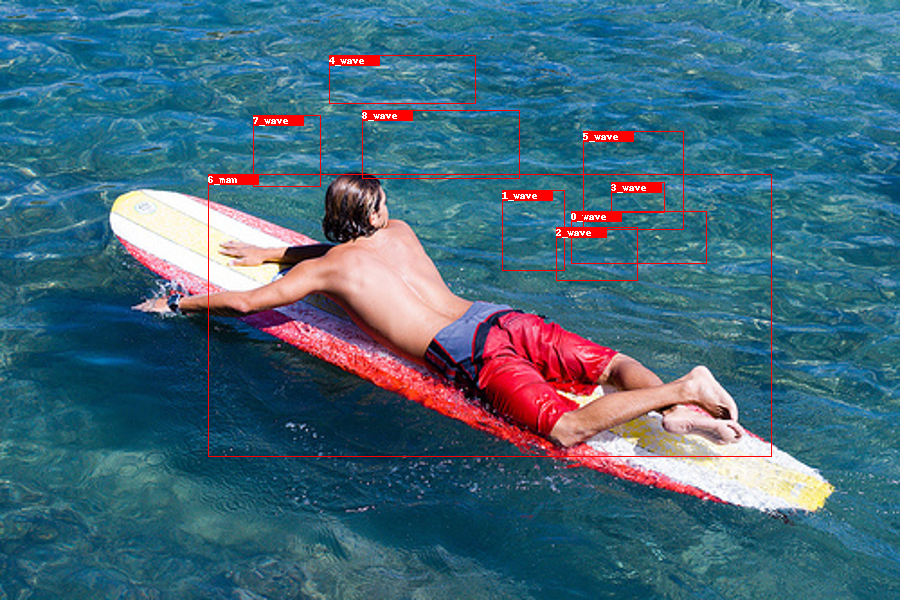

**************************************************
box_labels 0: wave
box_labels 1: wave
box_labels 2: wave
box_labels 3: wave
box_labels 4: wave
box_labels 5: wave
box_labels 6: man
box_labels 7: wave
box_labels 8: wave
**************************************************
rel_labels 0: 8_wave => behind => 6_man
rel_labels 1: 5_wave => behind => 6_man
rel_labels 2: 7_wave => behind => 6_man
rel_labels 3: 4_wave => behind => 6_man
rel_labels 4: 3_wave => behind => 6_man
rel_labels 5: 1_wave => behind => 6_man
rel_labels 6: 0_wave => behind => 6_man
rel_labels 7: 2_wave => behind => 6_man


In [20]:
query = random.randint(0, len(scene_graphs))
draw_graph(scene_graphs, data_info, query)